# Classification 

<AxesSubplot:>

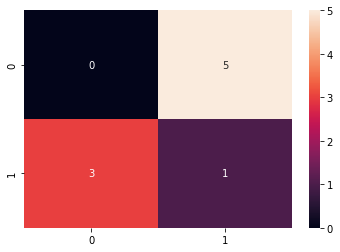

In [1]:
#1.Confusion Matrix
from sklearn import metrics
import seaborn as sn
y_true=[0,1,0,1,0,0,1,0,1]
y_pred=[1,1,1,0,1,1,0,1,0]
sn.heatmap(metrics.confusion_matrix(y_true,y_pred),annot=True)

In [2]:
tn,fp,fn,tp=metrics.confusion_matrix(y_true,y_pred).ravel()       #tp,fp,fn,tn---> tn,fp,fn,tp
tn,fp,fn,tp

(0, 5, 3, 1)

In [3]:
#2.Accuracy_score                             
metrics.accuracy_score(y_true,y_pred)                  # tn+tp/tn+fp+fn+tp

0.1111111111111111

In [4]:
#3.Precision_score
metrics.precision_score(y_true,y_pred)                # tp/tp+fp

0.16666666666666666

In [5]:
#4.Recall (or) Sensitivity
metrics.recall_score(y_true,y_pred)                   # tp/tp+fn

0.25

In [6]:
# 5.F1_score
metrics.f1_score(y_true,y_pred)                     # 2*precision*recall/(precision+recall)

0.2

# Regression

In [7]:
# 1.Mean Square Error                                             # MSE formula = (1/n) * Σ(y-Yp)2
from sklearn import metrics                                       # Where,
y_true=[0,1,0,1,0,0,1,0,1]                                        # n=no.of data points, y=actual output value
y_pred=[1,1,1,0,1,1,0,1,0]                                        # Yp= predicted output value
metrics.mean_squared_error(y_true,y_pred)                    

0.8888888888888888

In [8]:
# 2.Mean Absolute Error
metrics.mean_absolute_error(y_true,y_pred)                 # 1/n Σ |y-Yp|

0.8888888888888888

In [9]:
# 3.R2_score                                           # RMSE = 1-SSres/SStot   => 1-Σi(y-Yp)2 / Σi(y-Yp)
metrics.r2_score(y_true,y_pred)                        # where,  SSres=Sum square of residuals, SStot = sum square of Total

-2.5999999999999996

In [10]:
# 4.Root mean square error
import math                                           # RMSE= √Σn(i=1) (Yp-y) /n
MSE=metrics.mean_squared_error(y_true,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.9428090415820634

In [17]:
#Adjusted R2 score
import numpy as np                                           # Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
r2_score=metrics.r2_score(y_true,y_pred)                     # Where: n= sample Size
n=9                                                          #        k=no.of independent (x) variables.
p=3
x=(1-r2_score) 
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: -4.76


# Backward Elimination (Adjusted R-Squared)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn
dataset=pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [40]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X[: ,3] = labelencoder.fit_transform(X[: ,3])
ct=ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X),dtype=np.float)

In [43]:
x=x[:,1:]
x

array([[0.0000000e+00, 1.0000000e+00, 4.8000000e+01, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 4.7000000e+01, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 4.6000000e+01, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 4.5000000e+01, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 4.4000000e+01, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 4.2000000e+01, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 4.3000000e+01, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 4.1000000e+01, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 3.9000000e+01, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 4.0000000e+01, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 3.6000000e+01, 1.1059411e+05,
        2.29

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
print(x_train.shape)
print(x_train.size)
x_train

(40, 5)
200


array([[1.0000000e+00, 0.0000000e+00, 1.5000000e+01, 1.0305749e+05,
        2.1463481e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3000000e+01, 8.5047440e+04,
        2.0551764e+05],
       [1.0000000e+00, 0.0000000e+00, 2.5000000e+01, 1.4413598e+05,
        1.3405007e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4000000e+01, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 3.1000000e+01, 1.1417579e+05,
        2.9491957e+05],
       [1.0000000e+00, 0.0000000e+00, 4.1000000e+01, 1.4553006e+05,
        3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 3.8000000e+01, 1.5654742e+05,
        2.5651292e+05],
       [0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.2415304e+05,
        1.9039300e+03],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.1743150e+04,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.0000000e+01, 1.5303206e+05,
        1.0713838e+05],
       [0.0000000e+00, 1.0000000e+00, 3.7000000e+01, 1.2261684e+05,
        2.61

In [47]:
print(x_test.shape)
print(x_test.size)
x_test

(10, 5)
50


array([[1.0000000e+00, 0.0000000e+00, 2.1000000e+01, 1.8264556e+05,
        1.1814820e+05],
       [0.0000000e+00, 0.0000000e+00, 3.5000000e+01, 9.1790610e+04,
        2.4974455e+05],
       [1.0000000e+00, 0.0000000e+00, 3.6000000e+01, 1.1059411e+05,
        2.2916095e+05],
       [1.0000000e+00, 0.0000000e+00, 8.0000000e+00, 8.4710770e+04,
        1.6447071e+05],
       [1.0000000e+00, 0.0000000e+00, 4.6000000e+01, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 2.3000000e+01, 1.2786455e+05,
        3.5318381e+05],
       [0.0000000e+00, 1.0000000e+00, 5.0000000e+00, 6.5947930e+04,
        1.8526510e+05],
       [0.0000000e+00, 1.0000000e+00, 1.6000000e+01, 1.5270192e+05,
        8.8218230e+04],
       [1.0000000e+00, 0.0000000e+00, 2.4000000e+01, 1.2278275e+05,
        3.0331926e+05],
       [1.0000000e+00, 0.0000000e+00, 4.4000000e+01, 9.1391770e+04,
        3.6616842e+05]])

In [48]:
print(y_train.shape)
print(y_train.size)
y_train

(40,)
40


array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [49]:
print(y_test.shape)
print(y_test.size)
y_test

(10,)
10


array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=regressor.predict(x_test)
y_pred

array([100815.65143643, 141065.32323456, 140351.4842569 ,  69602.81317407,
       171849.80561966, 115796.48839867,  64138.93341569,  88177.53284686,
       114766.47156368, 165080.49074038])

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9217139712234192

In [55]:
import statsmodels.api as sm
x=np.append(arr=np.ones((50,1)).astype(int),values=x,axis=1)
x_opt=x[:,[0,1,2,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     149.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.36e-25
Time:                        19:27:22   Log-Likelihood:                -534.22
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      45   BIC:                             1088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.815e+04   3695.873      7.617      0.000    2.07e+04    3.56e+04
x1          2.815e+04   3695.873      7.617      0.000    2.07e+04    3.56e+04
x2           512.9079   3925.395      0.131      0.897   -7393.244    8419.060
x3          -737.6051   3845.613     -0.192      0.849   -8483.067    7007.857
x4          2699.5564    114.469     23.583      0.000    2469.005    2930.108
x5            -0.0634      0.059     -1.081      0.286      -0.182       0.055
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                3.728
Skew:                          -0.552   Prob(JB):                        0.155
Kurtosis:                       3.756   Cond. No.                     3.78e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
x_opt=x[:,[0,1,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     203.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.53e-26
Time:                        19:28:58   Log-Likelihood:                -534.23
No. Observations:                  50   AIC:                             1076.
Df Residuals:                      46   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.826e+04   3561.327      7.935      0.000    2.11e+04    3.54e+04
x1          2.826e+04   3561.327      7.935      0.000    2.11e+04    3.54e+04
x2          -989.3026   3292.629     -0.300      0.765   -7617.021    5638.416
x3          2701.8287    111.925     24.140      0.000    2476.536    2927.121
x4            -0.0636      0.058     -1.096      0.279      -0.180       0.053
==============================================================================
Omnibus:                        5.033   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.911
Skew:                          -0.557   Prob(JB):                        0.141
Kurtosis:                       3.798   Cond. No.                     6.80e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
x_opt=x[:,[0,3,4,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     203.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.53e-26
Time:                        19:30:20   Log-Likelihood:                -534.23
No. Observations:                  50   AIC:                             1076.
Df Residuals:                      46   BIC:                             1084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.652e+04   7122.655      7.935      0.000    4.22e+04    7.09e+04
x1          -989.3026   3292.629     -0.300      0.765   -7617.021    5638.416
x2          2701.8287    111.925     24.140      0.000    2476.536    2927.121
x3            -0.0636      0.058     -1.096      0.279      -0.180       0.053
==============================================================================
Omnibus:                        5.033   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.911
Skew:                          -0.557   Prob(JB):                        0.141
Kurtosis:                       3.798   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
x_opt=x[:,[0,3,5]]
regressor_ols=sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.372
Time:                        19:31:21   Log-Likelihood:                -599.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.613e+04   2.59e+04      2.942      0.005    2.41e+04    1.28e+05
x1          2555.2116    1.2e+04      0.212      0.833   -2.16e+04    2.68e+04
x2             0.2885      0.205      1.404      0.167      -0.125       0.702
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.139
Skew:                           0.099   Prob(JB):                        0.933
Kurtosis:                       2.835   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Create Your Own Metrics

In [1]:
import pandas as pd
from sklearn import datasets
df=datasets.load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
x=df.data
x=pd.DataFrame(x,columns=df.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=pd.Series(df.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [5]:
y.value_counts()

1    357
0    212
dtype: int64

In [7]:
y=pd.Series(df.target).map({0:1,1:0})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [8]:
y.value_counts()

0    357
1    212
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
print(x_train.shape)
print(x_train.size)
x_train.head()

(455, 30)
13650


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [11]:
print(x_test.shape)
print(x_test.size)
x_test.head()

(114, 30)
3420


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [13]:
print(y_train.shape)
print(y_train.size)
y_train.head()

(455,)
455


338    0
427    0
406    0
96     0
490    0
dtype: int64

In [14]:
print(y_test.shape)
print(y_test.size)
y_test.head()

(114,)
114


512    1
457    0
439    0
298    0
37     0
dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=1)
cls

RandomForestClassifier(max_depth=1)

In [17]:
from sklearn.metrics import confusion_matrix,make_scorer
def fnr(y_true,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
    return (fn)/(fn+tn)
fnr_score=make_scorer(fnr, greater_is_better=False)

In [19]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[10,20,30,40,50,100],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5]}
gs=GridSearchCV(cls,parameters,scoring=fnr_score,cv=5)
gs

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring=make_scorer(fnr, greater_is_better=False))

In [20]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring=make_scorer(fnr, greater_is_better=False))

In [21]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 40}

In [22]:
gs.best_score_

-0.042919999097512256

In [26]:
from sklearn.metrics import confusion_matrix,make_scorer
def fpr(y_true,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
    return (fp)/(fn+tn)
fpr_score=make_scorer(fpr, greater_is_better=False)

In [27]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[10,20,30,40,50,100],'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5]}
gs=GridSearchCV(cls,parameters,scoring=fpr_score,cv=5)
gs

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring=make_scorer(fpr, greater_is_better=False))

In [28]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring=make_scorer(fpr, greater_is_better=False))

In [29]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 30}

In [30]:
gs.best_score_

-0.013508573582061428